In [2]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
plt.style.use('ggplot')

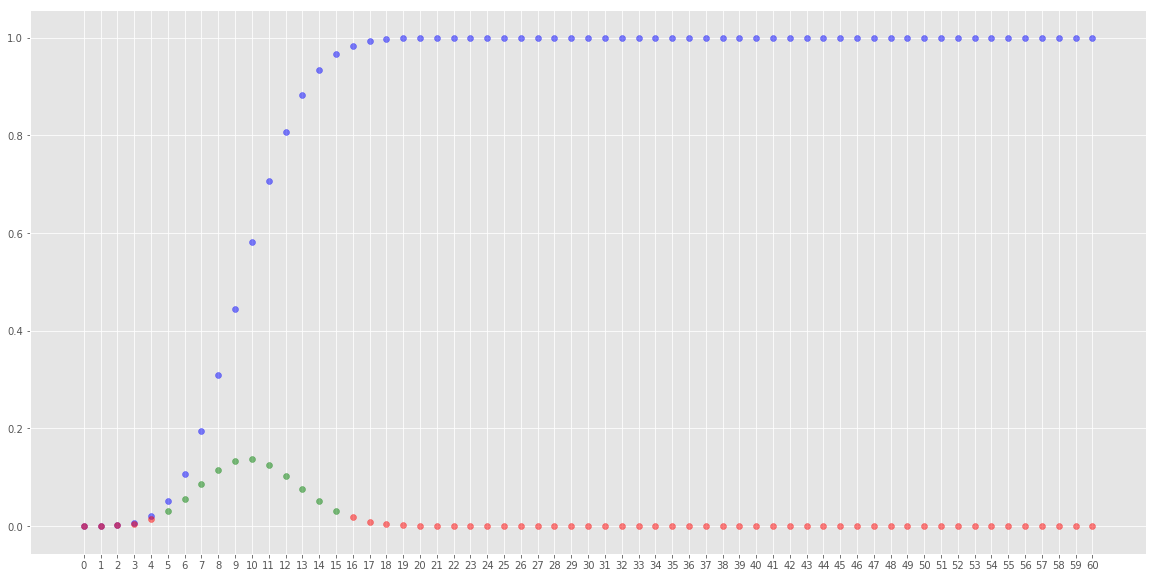

In [5]:
def binomial(n, p):
    # 0, 1, 2, ..., n
    rs = np.arange(0,n+1)
    # nCr/2**n
    ps = scipy.special.comb(n,rs)*p**rs*(1-p)**(n-rs)
    
    # Cumulative probability
    cs = np.cumsum(ps)
    
    # Critical region
    s = 0.05/2
    cl, ch = s, 1-s
    indices = np.logical_and(cs >= cl, cs <= ch)
    
    f, ax = plt.subplots()
    f.set_figwidth(20)
    f.set_figheight(10)

    ax.set_xticks(rs)
    ax.scatter(rs, cs, c='blue',alpha=0.5)
    ax.scatter(rs[indices], ps[indices], c='green', alpha=0.5)
    ax.scatter(rs[~indices], ps[~indices], c='red', alpha=0.5)
    return ax
binomial(60, 0.167);